In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from numpy.random import seed
import umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import plotly.express as px
randomState = 123
seed(randomState)

In [2]:
step1_exp_index = 38
step2_exp_index = 35

# step1_y_true_filename = "y_true_L1000_MCF7.txt"
# step1_y_pred_filename = "y_pred_L1000_MCF7.txt"
# step2_y_true_filename = "y_true_ARCHS4_MCF7.txt"
# step2_y_pred_filename = "y_pred_ARCHS4_MCF7.txt"
# eval_dataset_nameA = "L1000_MCF7"
# eval_dataset_nameB = "ARCHS4_MCF7_landmark"
# eval_output_dataset_name = "ARCHS4_MCF7"

step1_y_true_filename = "y_true_L1000_GTEx.txt"
step1_y_pred_filename = "y_pred_L1000_GTEx.txt"
step2_y_true_filename = "y_true_ARCHS4_GTEx.txt"
step2_y_pred_filename = "y_pred_ARCHS4_GTEx.txt"
eval_dataset_nameA = "GTEx_L1000"
eval_dataset_nameB = "GTEx_RNAseq_landmark"
eval_output_dataset_name = "GTEx_RNAseq"



In [3]:
y_input = pd.read_csv(f"../output/{step1_exp_index}/prediction/y_input.txt", sep="\t", index_col=0)

In [4]:
# plot results
y_true = pd.read_csv(f"../output/{step1_exp_index}/prediction/{step2_y_true_filename}", sep="\t", index_col=0)
y_pred = pd.read_csv(f"../output/{step1_exp_index}/prediction/{step2_y_pred_filename}", sep="\t", index_col=0)
# y_true = pd.read_csv(f"../output/{step1_exp_index}/prediction/{step1_y_true_filename}", sep="\t", index_col=0)
# y_pred = pd.read_csv(f"../output/{step1_exp_index}/prediction/{step1_y_pred_filename}", sep="\t", index_col=0)
# y_input = pd.read_csv(f"../output/{step1_exp_index}/prediction/y_input.txt", sep="\t", index_col=0)

# shuffled_y_true = pd.read_csv(f"../output/{exp_index}/prediction/shuffle_y_true.txt", sep="\t", header=None)
# shuffled_y_pred = pd.read_csv(f"../output/{exp_index}/prediction/shuffle_y_pred.txt", sep="\t", header=None)
print(f"../output/{step1_exp_index}/prediction/{step1_y_true_filename}")
print(f"../output/{step1_exp_index}/prediction/{step1_y_pred_filename}")


../output/38/prediction/y_true_L1000_GTEx.txt
../output/38/prediction/y_pred_L1000_GTEx.txt


In [7]:
y_pred.shape

(2929, 22240)

In [8]:
y_true.shape

(2929, 22240)

In [9]:
# gtex metadata
gtex_metadata = pd.read_csv("../data/GTEx/GSE92743_Broad_GTEx_inst_info.txt", sep="\t", index_col=0)
gtex_metadata = gtex_metadata.loc[y_true.index, :]
labels = gtex_metadata["tissue"].tolist()

In [8]:
tsne = TSNE(n_components=2)
u = tsne.fit_transform(pd.concat([y_true]))
u_df = pd.DataFrame(u)
u_df["label"] = labels

fig = px.scatter(u_df, x=0, y=1, color='label')#, label=label)
fig.show()


In [9]:
tsne = TSNE(n_components=2)
u = tsne.fit_transform(pd.concat([y_pred]))
u_df = pd.DataFrame(u)
u_df["label"] = labels

fig = px.scatter(u_df, x=0, y=1, color='label')#, label=label)
fig.show()


In [11]:
tsne = TSNE(n_components=2)
u = tsne.fit_transform(pd.concat([y_input]))
u_df = pd.DataFrame(u)
u_df["label"] = labels

fig = px.scatter(u_df, x=0, y=1, color='label')#, label=label)
fig.show()


In [14]:
import scipy.stats as ss
def znorm(data):
    norm = data.T.apply(ss.zscore, axis=0).T.dropna()
    return norm


In [12]:
import itertools
from scipy.stats import pearsonr
def paired_pearson_correlation(l):
    pcc = list()
    for i, j in itertools.combinations(l, 2):
        pcc.append(pearsonr(i, j)[0])
    return sum(pcc)/len(pcc)

In [13]:
pcc_by_gene = dict()
for i in range(y_true.shape[1]):
    gene = y_true.columns[i]
    pcc_by_gene[gene] = pearsonr(y_pred.iloc[:, i], y_true.iloc[:, i])[0]    
well_behave_genes = [x[0] for x in sorted(pcc_by_gene.items(), key=lambda x: x[1], reverse=True)[:200]]

# well_behave_genes = y_pred.mean().sort_values(ascending=False).iloc[:100].index.tolist()


In [17]:
y_true = znorm(y_true)
y_pred = znorm(y_pred)
y_input = znorm(y_input)

In [18]:
# tsne = TSNE(n_components=2)
# tsne = umap.UMAP()
tsne = PCA(n_components=2)
u_true = tsne.fit_transform(pd.concat([y_true]))
u_pred = tsne.fit_transform(pd.concat([y_pred]))
u_input = tsne.fit_transform(pd.concat([y_input]))

# u_true = tsne.fit_transform(pd.concat([y_true.loc[:, well_behave_genes]]))
# u_pred = tsne.fit_transform(pd.concat([y_pred.loc[:, well_behave_genes]]))
# u_input = tsne.fit_transform(pd.concat([y_input.loc[:, well_behave_genes]]))


u_true_df = pd.DataFrame(u_true)
u_true_df["label"] = labels

u_pred_df = pd.DataFrame(u_pred)
u_pred_df["label"] = labels

u_input_df = pd.DataFrame(u_input)
u_input_df["label"] = labels




Adipose - Subcutaneous


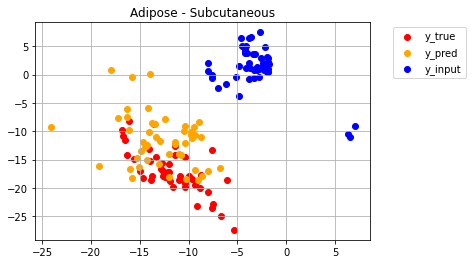

Adipose - Visceral (Omentum)


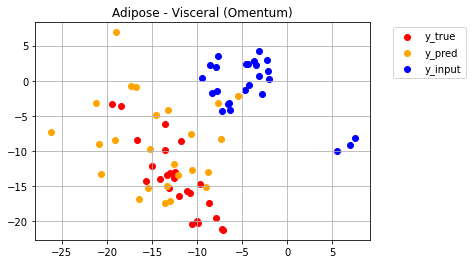

Adrenal Gland


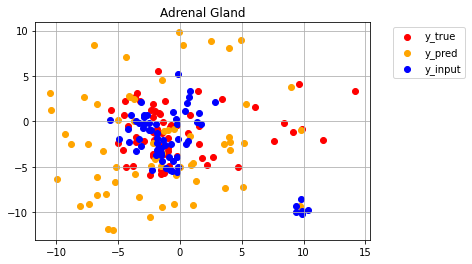

Artery - Aorta


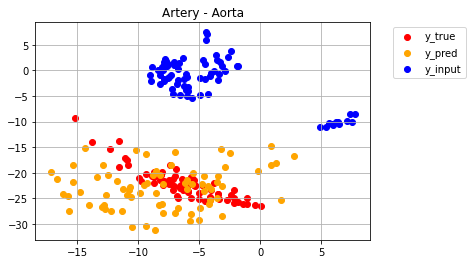

Artery - Coronary


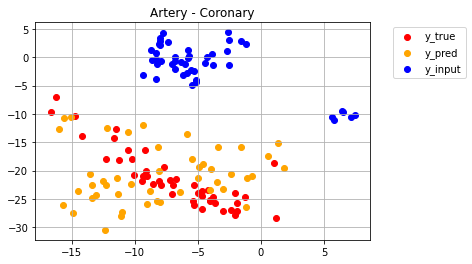

Artery - Tibial


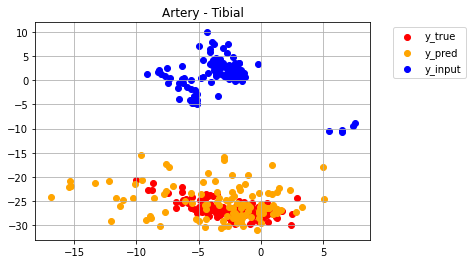

Bladder


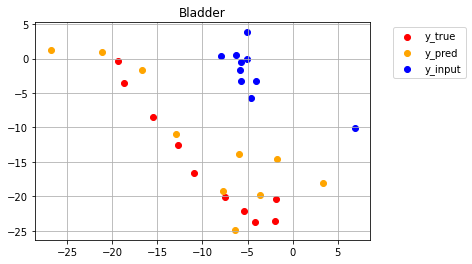

Brain - Amygdala


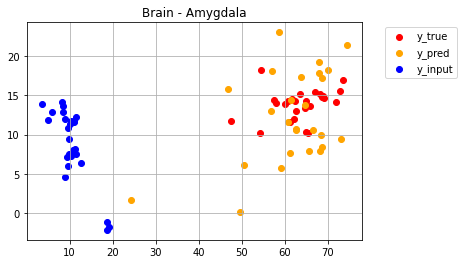

Brain - Anterior cingulate cortex (BA24)


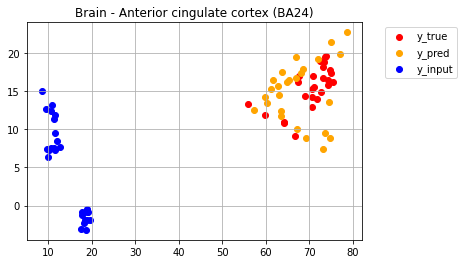

Brain - Caudate (basal ganglia)


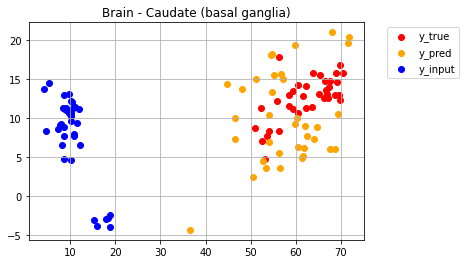

Brain - Cerebellar Hemisphere


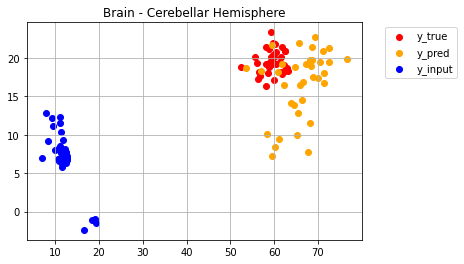

Brain - Cerebellum


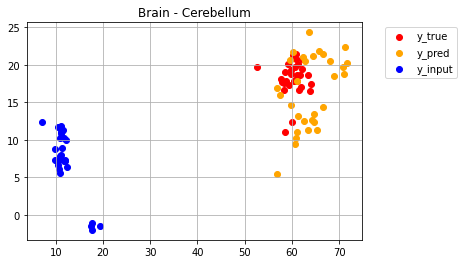

Brain - Cortex


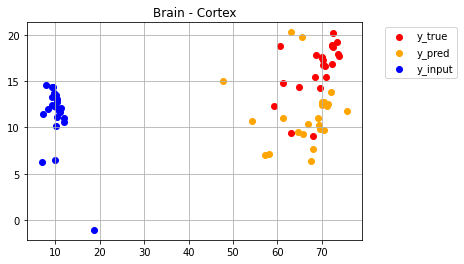

Brain - Frontal Cortex (BA9)


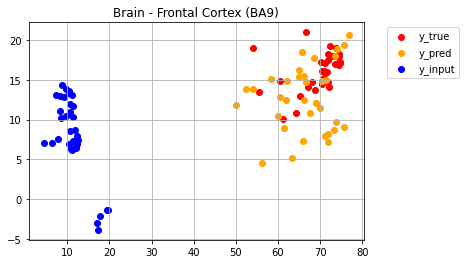

Brain - Hippocampus


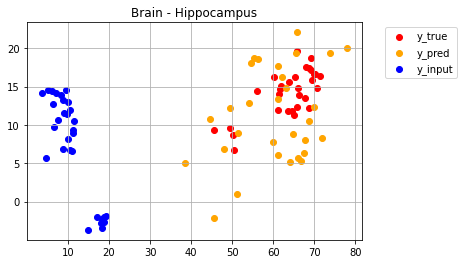

Brain - Hypothalamus


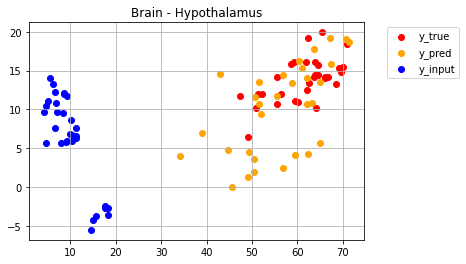

Brain - Nucleus accumbens (basal ganglia)


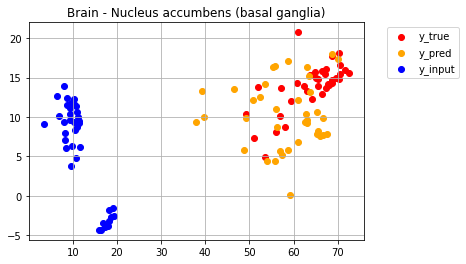

Brain - Putamen (basal ganglia)


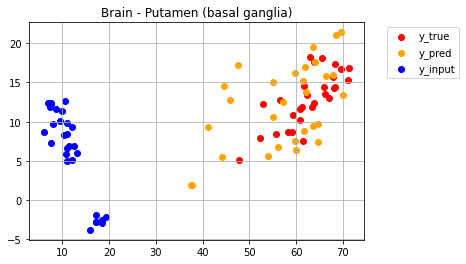

Brain - Spinal cord (cervical c-1)


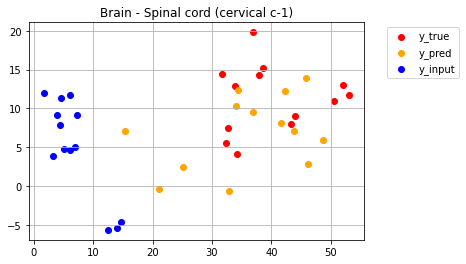

Brain - Substantia nigra


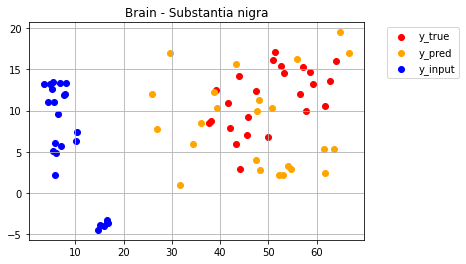

Breast - Mammary Tissue


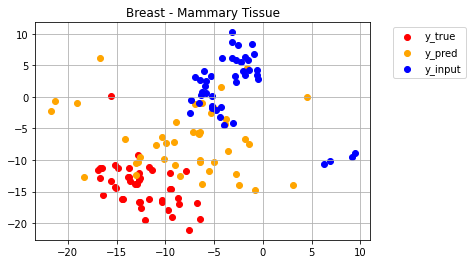

Cells - EBV-transformed lymphocytes


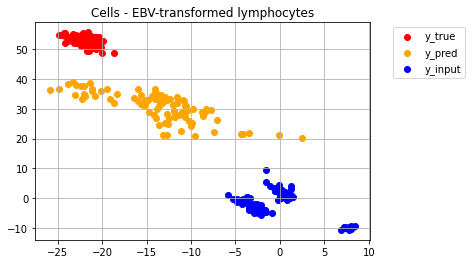

Cells - Transformed fibroblasts


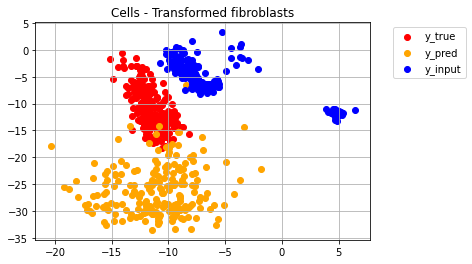

Cervix - Ectocervix


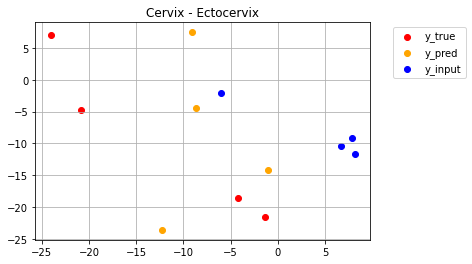

Cervix - Endocervix


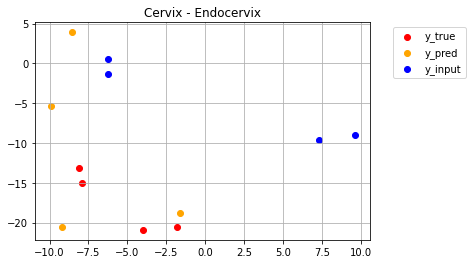

Colon - Sigmoid


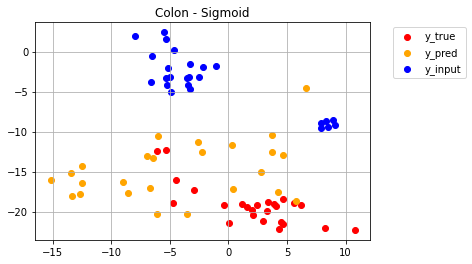

Colon - Transverse


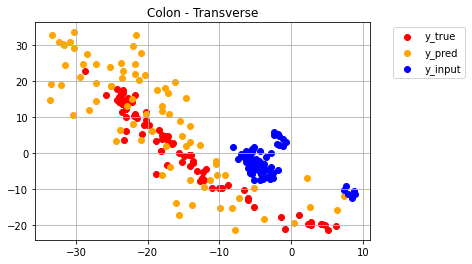

Esophagus - Gastroesophageal Junction


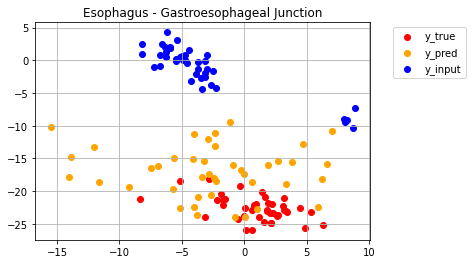

Esophagus - Mucosa


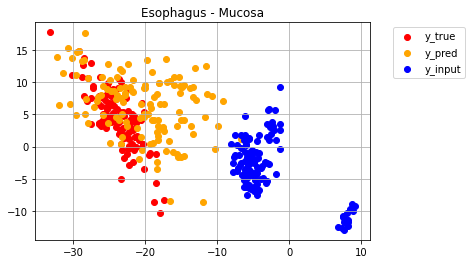

Esophagus - Muscularis


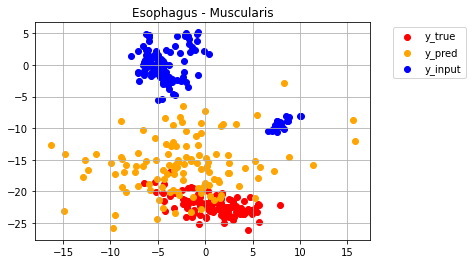

Fallopian Tube


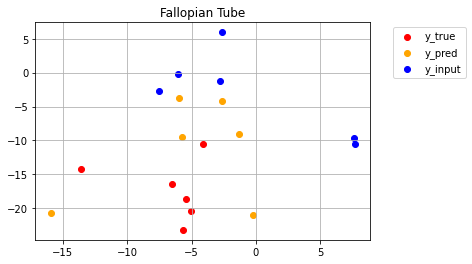

Heart - Atrial Appendage


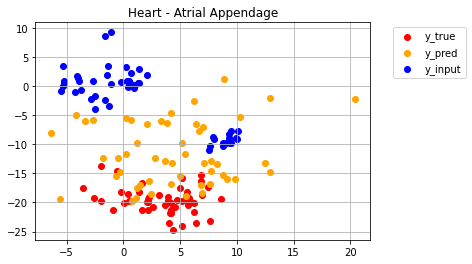

Heart - Left Ventricle


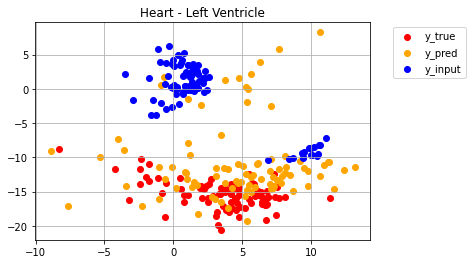

Kidney - Cortex


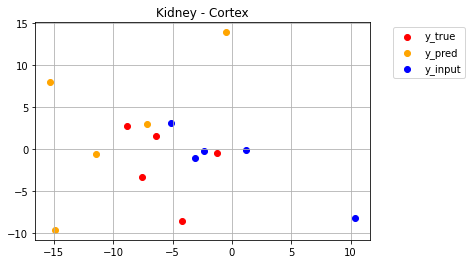

Liver


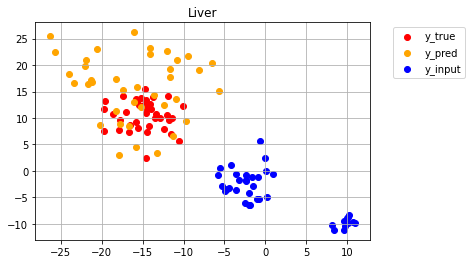

Lung


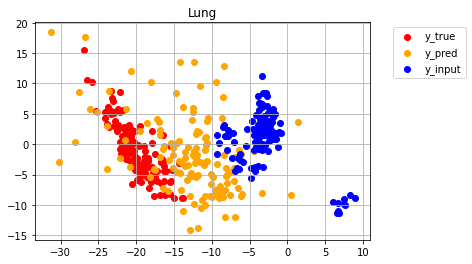

Minor Salivary Gland


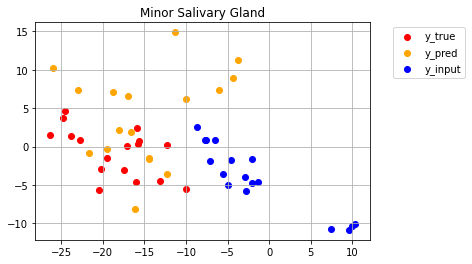

Muscle - Skeletal


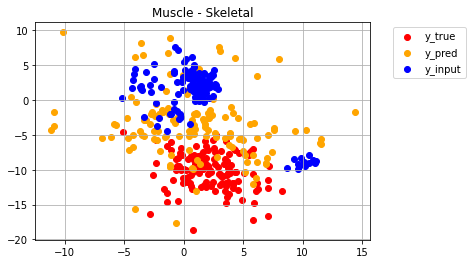

Nerve - Tibial


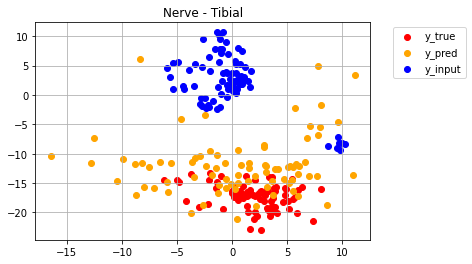

Ovary


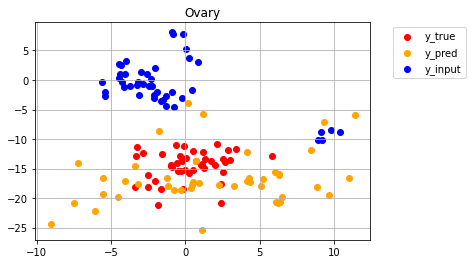

Pancreas


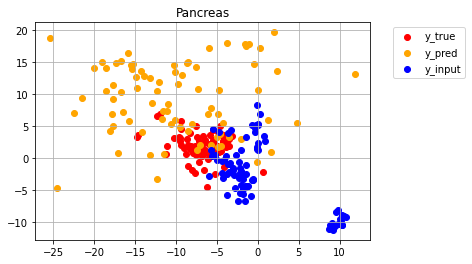

Pituitary


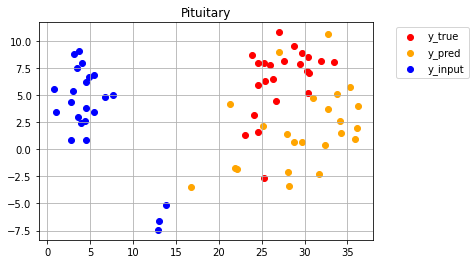

Prostate


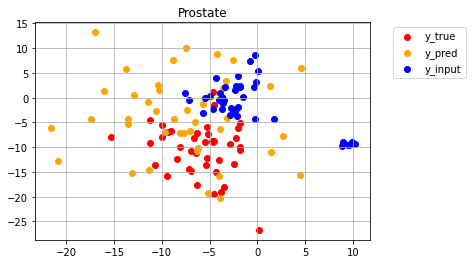

Skin - Not Sun Exposed (Suprapubic)


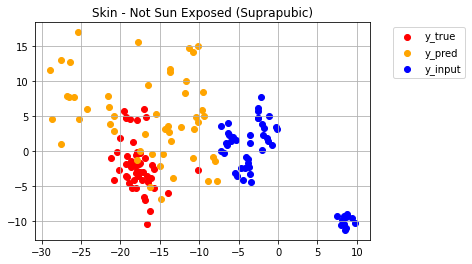

Skin - Sun Exposed (Lower leg)


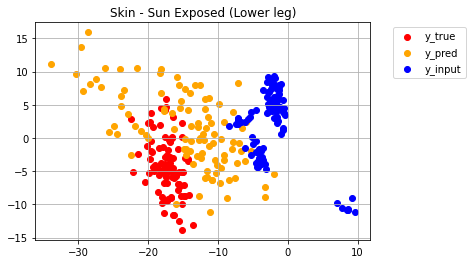

Small Intestine - Terminal Ileum


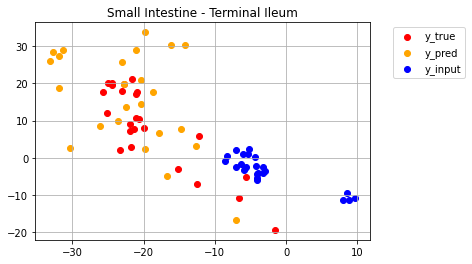

Spleen


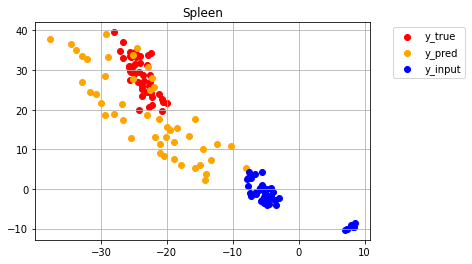

Stomach


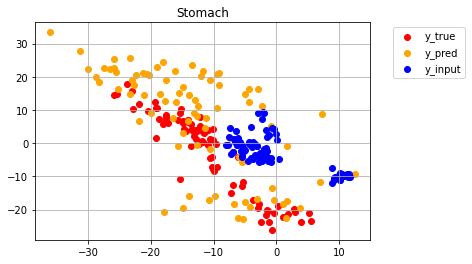

Testis


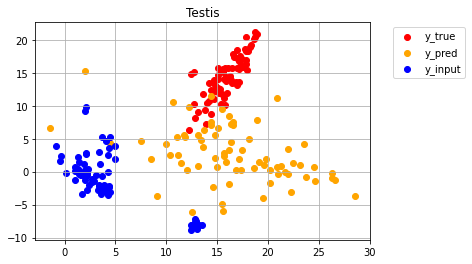

Thyroid


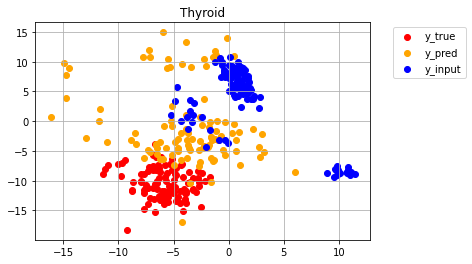

Uterus


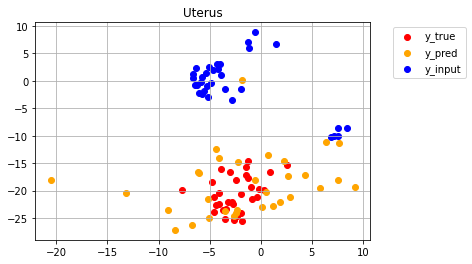

Vagina


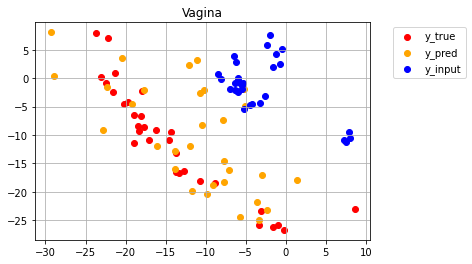

Whole Blood


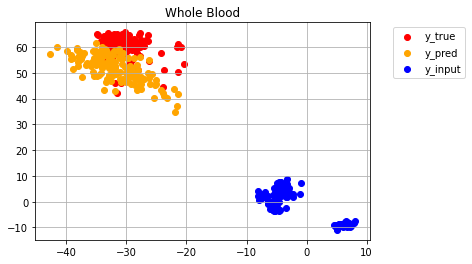

In [20]:
for label in sorted(list(set(labels))):
    fig, ax = plt.subplots()
    print(label)
    u_true_df_tmp = u_true_df.loc[u_true_df["label"] == label]
    u_pred_df_tmp = u_pred_df[u_true_df["label"] == label]
    u_input_df_tmp = u_input_df[u_true_df["label"] == label]

    ax.scatter(u_true_df_tmp.loc[:,0], u_true_df_tmp.loc[:,1], label="y_true", c="red")
    ax.scatter(u_pred_df_tmp.loc[:,0], u_pred_df_tmp.loc[:,1], label="y_pred", c="orange")
    ax.scatter(u_input_df_tmp.loc[:,0], u_input_df_tmp.loc[:,1], label="y_input", c="blue")
    # print(paired_pearson_correlation(y_true.iloc[u_true_df_tmp.index, :].values))
    # print(paired_pearson_correlation(y_pred.iloc[u_pred_df_tmp.index, :].values))
    # print(paired_pearson_correlation(y_input.iloc[u_input_df_tmp.index, :].values))

    # break
    ax.legend()
    ax.grid(True)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    plt.title(label)
    plt.savefig(f"../output/{step1_exp_index}/viz/{label}.png", bbox_inches='tight')
    plt.savefig(f"../output/{step1_exp_index}/viz/{label}.pdf", bbox_inches='tight')
    plt.savefig(f"../output/{step1_exp_index}/viz/{label}.svg", bbox_inches='tight')

    plt.show()
    # break